In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
## Use func so we can get the min, and max values
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [13]:
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [14]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [15]:
engine.execute("SELECT * FROM measurement WHERE date >'2017-08-01'").fetchall()

[(2705, 'USC00519397', '2017-08-02', 0.0, 73.0),
 (2706, 'USC00519397', '2017-08-03', 0.0, 79.0),
 (2707, 'USC00519397', '2017-08-04', 0.02, 80.0),
 (2708, 'USC00519397', '2017-08-05', 0.0, 81.0),
 (2709, 'USC00519397', '2017-08-06', 0.0, 80.0),
 (2710, 'USC00519397', '2017-08-07', 0.0, 80.0),
 (2711, 'USC00519397', '2017-08-08', 0.0, 80.0),
 (2712, 'USC00519397', '2017-08-09', 0.0, 80.0),
 (2713, 'USC00519397', '2017-08-10', 0.0, 81.0),
 (2714, 'USC00519397', '2017-08-11', 0.0, 78.0),
 (2715, 'USC00519397', '2017-08-12', 0.0, 80.0),
 (2716, 'USC00519397', '2017-08-13', 0.0, 81.0),
 (2717, 'USC00519397', '2017-08-14', 0.0, 79.0),
 (2718, 'USC00519397', '2017-08-15', 0.02, 78.0),
 (2719, 'USC00519397', '2017-08-18', 0.0, 80.0),
 (2720, 'USC00519397', '2017-08-19', 0.0, 79.0),
 (2721, 'USC00519397', '2017-08-20', 0.0, 81.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7617, 'USC005148

In [16]:
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [17]:
# Exploratory Climate Analysis

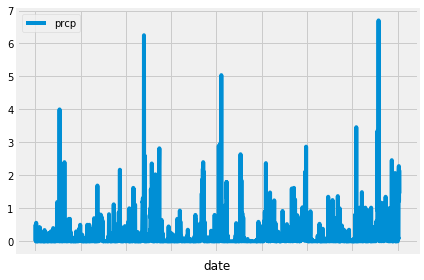

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date <"2017-08-23").filter(Measurement.date >"2016-08-23").\
    order_by(Measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame and set the index 
#to the date column

df = pd.DataFrame(results, columns=['date', 'prcp'])
df = df.dropna(how='any')
df.set_index('date', inplace=True, )
df.head(10)

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
# Plot the dataframe as a horizontal bar chart using pandas plotting
df.plot(x_compat=True)
plt.tight_layout()
plt.show()

![precipitation](Images/precipitation.png)

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2011.000000
mean,0.176549
std,0.460667
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [20]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [21]:
# Design a query to show how many stations are available in this dataset?
results = session.query(func.count(Station.name)).all()
print(results)

[(9,)]


In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
results = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(results)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?  
## Tam's notes:  Refer to 3.3 output #9
results = session.query(Measurement.station =='USC00519281', func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).all()
print("Lowest temp: 53, the average temp was 73 and the highest temp was 87.")

Lowest temp: 53, the average temp was 73 and the highest temp was 87.


In [24]:
# Query for the Dow closing price for `CSCO` 1 week before `2011-04-08` using the datetime library
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [25]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Plot the results as a histogram with bins=12.
date = dt.datetime(2015, 8, 23)

results = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.date > date).filter(Measurement.station =='USC00519281').all()

# Load the results into a pandas dataframe. Set the index to the `station`
df = pd.DataFrame(results[:365], columns=['station','date', 'temp'])
df.set_index('station', inplace=True, )
df.head(10)

,date,temp
station,,
USC00519281,2015-08-24,72.0
USC00519281,2015-08-25,79.0
USC00519281,2015-08-26,72.0
USC00519281,2015-08-27,75.0
USC00519281,2015-08-28,77.0
USC00519281,2015-08-29,82.0
USC00519281,2015-08-30,77.0
USC00519281,2015-08-31,76.0
USC00519281,2015-09-01,76.0


<Figure size 432x288 with 0 Axes>

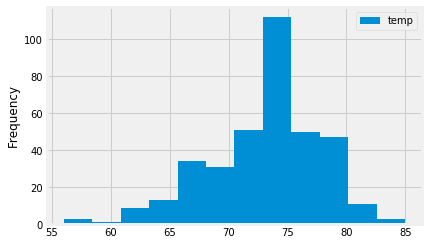

In [26]:
# Create the bins in which Data will be held

plt.figure();

df.plot.hist(stacked=True, bins=12)

![precipitation](Images/station-histogram.png)

In [27]:
####  Temperature Analysis (optional)



# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))




[(62.0, 69.57142857142857, 74.0)]


In [28]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.



In [29]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [30]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.31),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.25),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6,
  0.060000000000000005),
 ('USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  0.0),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.0)]

## Optional Challenge Assignment

In [31]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [32]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

In [33]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [34]:
# Plot the daily normals as an area plot with `stacked=False`